In [1]:
import sys
sys.path.insert(0, '../scripts')

import meals as ml
import tools as tl
import intervals as invs
from collections import defaultdict

import paths
from preprocessing import read_csv_clean

time_threshold = 60
pellet_count_threshold = 2

In [10]:
ctrl_data = defaultdict(list)
for path in paths.contigency_flip_ctrl:
    data = read_csv_clean(path, remove_trivial=False, collect_time=True)
    each_acc_dict = ml.extract_meals_data(data=data, 
                                          time_threshold=time_threshold,
                                          pellet_threshold=pellet_count_threshold)
    
    for key, item in each_acc_dict.items():
        ctrl_data[key].extend(item)
ml.print_meal_stats(ctrl_data)
# ctrl_data = ml.preprocess_meal_data(ctrl_data)
ctrl_data = ctrl_data[4]

Number of Pellets: 3, n_meals: 404
Number of Pellets: 4, n_meals: 282
Number of Pellets: 5, n_meals: 137
Total 958 meals and keep 823


In [3]:
exp_data = defaultdict(list)
for path in paths.contigency_flip_cask:
    data = read_csv_clean(path, remove_trivial=False, collect_time=True)
    each_acc_dict = ml.extract_meals_data(data=data, 
                                          time_threshold=time_threshold,
                                          pellet_threshold=pellet_count_threshold)
    
    for key, item in each_acc_dict.items():
        exp_data[key].extend(item)
ml.print_meal_stats(exp_data)
exp_data = ml.preprocess_meal_data(exp_data)

Number of Pellets: 5, n_meals: 398
Number of Pellets: 3, n_meals: 920
Number of Pellets: 4, n_meals: 765
Total 2457 meals and keep 2083


In [4]:
exp_data[:5]

array([[100.   , 100.   ,   0.   ,   0.   ,   0.   ],
       [100.   , 100.   ,   0.   ,   0.   ,   0.   ],
       [100.   ,   3.846,   0.   ,   0.   ,   0.   ],
       [ 40.   , 100.   ,   0.   ,   0.   ,   0.   ],
       [100.   ,  66.7  ,   0.   ,   0.   ,   0.   ]], dtype=float16)

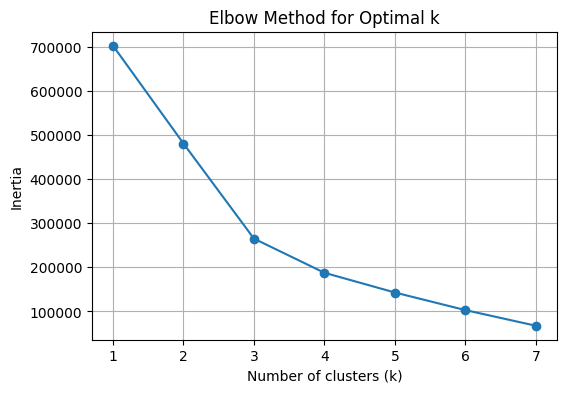

In [27]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

k_values = range(1, 8)
inertias = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(ctrl_data)
    inertias.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(6, 4))
plt.plot(k_values, inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [29]:
# Best Model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(ctrl_data)
labels = kmeans.labels_

print("Cluster labels:")
print(labels)

score = silhouette_score(ctrl_data, kmeans.labels_)
print("Silhouette Score:", score)

Cluster labels:
[2 1 1 2 0 2 2 0 0 2 2 2 2 2 2 1 1 2 0 1 2 1 1 1 1 1 0 2 2 0 1 0 2 0 1 1 2
 0 2 0 2 0 2 0 0 1 0 1 2 0 2 2 0 0 2 2 2 2 2 0 2 1 0 1 2 1 2 0 0 1 2 2 1 2
 2 0 2 2 1 0 1 0 2 2 2 2 0 2 2 0 2 0 1 0 2 2 2 2 2 2 1 2 2 2 2 0 1 2 2 1 0
 1 2 2 2 2 0 2 0 2 0 2 2 2 1 2 2 0 0 2 2 1 2 2 2 2 0 2 2 2 2 1 2 2 2 2 2 2
 2 2 0 2 0 2 1 2 2 0 0 0 2 0 2 2 2 2 0 0 0 2 2 0 2 1 2 2 2 2 2 2 1 0 0 2 2
 1 2 0 0 1 1 2 2 2 2 2 2 0 1 0 1 1 2 0 2 0 1 2 2 1 2 2 2 2 0 2 0 2 0 1 0 0
 2 0 1 0 1 2 2 2 2 2 0 0 1 1 2 2 0 1 0 1 1 2 1 2 2 0 1 2 0 2 2 0 0 2 0 2 1
 1 2 0 2 2 0 1 0 0 0 1 2 2 1 0 1 1 0 1 2 0 0 2]
Silhouette Score: 0.610532713034884


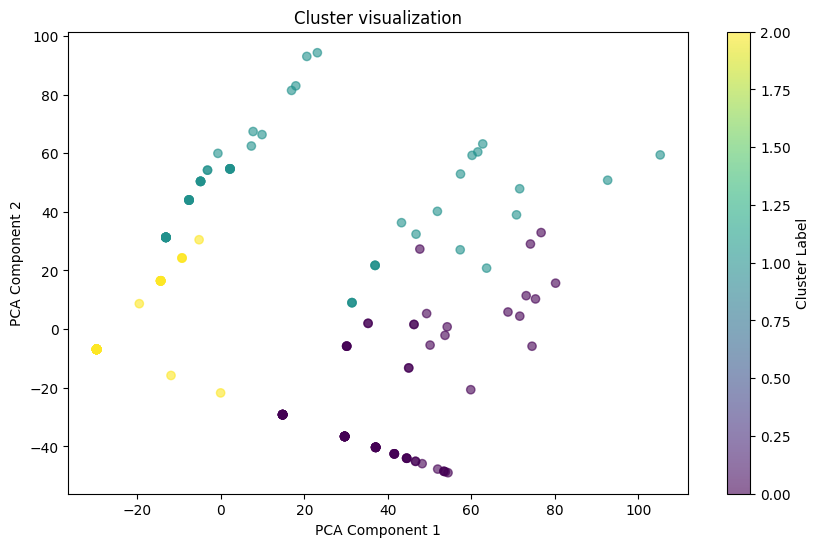

In [30]:
from sklearn.decomposition import PCA

# Reducing dimensionality for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(ctrl_data)

# Plotting
plt.figure(figsize=(10, 6))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.title('Cluster visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, label='Cluster Label')
plt.show()